In [ ]:
!pip install keras

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
train_path="rps-final-dataset/train"
test_path="rps-final-dataset/test"
val_path="rps-final-dataset/val"

In [4]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [5]:
image_path

'rps-final-dataset/train/scissors/ZzIlyDP6opy9ifkB.png'

In [6]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [7]:
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [8]:
# Import the NumPy module
import numpy as np

# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

x_test, must be divided by 255.0 for normalization

In [9]:
test_x=test_x/255.0

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,target_size
= (224, 224), batch_size = 32, class_mode = 'sparse')

Found 1401 images belonging to 3 classes.


In [11]:
test_set = test_datagen.flow_from_directory(test_path, target_size =
(224, 224), batch_size = 32, class_mode = 'sparse')

Found 437 images belonging to 3 classes.


In [12]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (224,
224), batch_size = 32, class_mode = 'sparse')

Found 350 images belonging to 3 classes.


In [13]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [14]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1401,), (437,), (350,))

In [15]:
labels = {value: key for key, value in
training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")

for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : paper
1 : rock
2 : scissors


View some sample training images

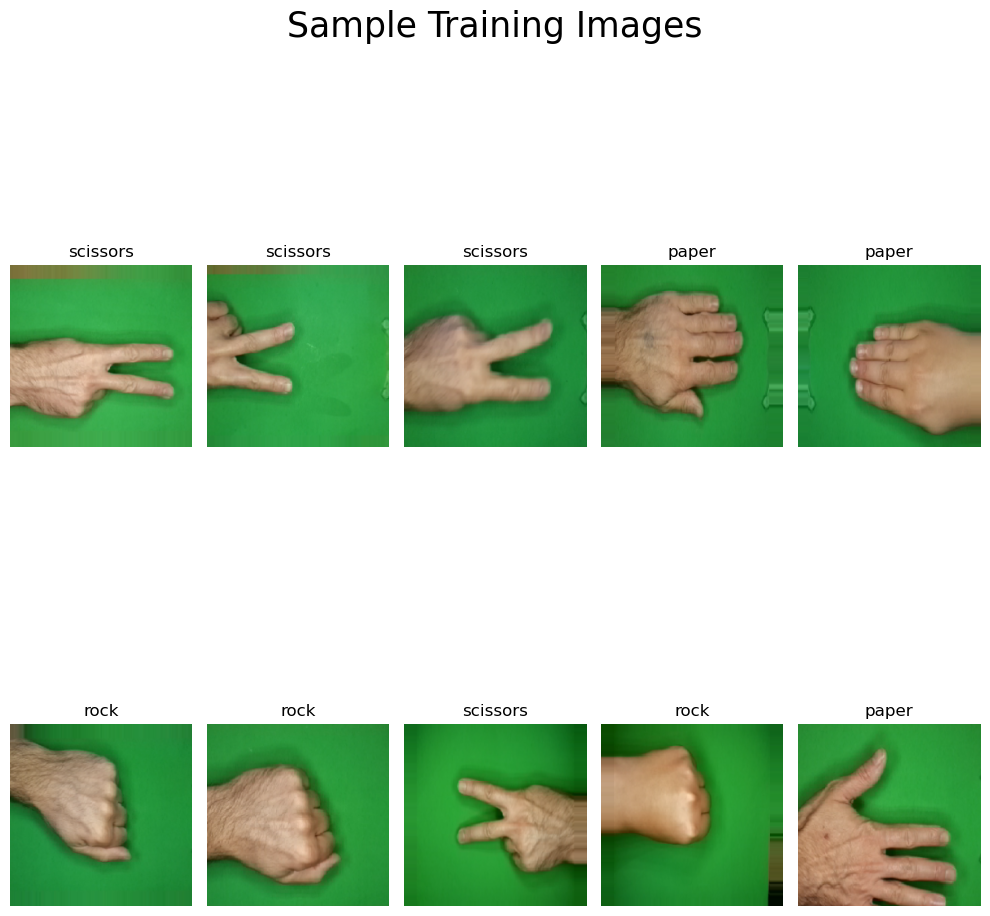

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
    for j in range(5):
        label = labels[training_set[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
        
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

Build the model

In [17]:
from tensorflow.keras.applications import VGG19

vgg = VGG19(input_shape=(224,224,3), weights='imagenet',
include_top=False)

#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [18]:
from tensorflow.keras.layers import Flatten
x = Flatten()(vgg.output)

In [26]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [27]:
# view the structure of the model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [28]:
model.compile( loss='sparse_categorical_crossentropy',
optimizer="adam",
metrics=['accuracy']
)

In [29]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min',
verbose=1, patience=3)
#Early stopping to avoid overfitting of model

In [30]:
model_file = 'best_vgg_model.keras'

In [31]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss',
mode='min', verbose=1, save_best_only=True)

In [32]:
# fit the model
history = model.fit(
    training_set,
    validation_data=val_set ,
    epochs=3,
    callbacks=[early_stopping_monitor, model_check_point],
    batch_size=32,shuffle=True)

Epoch 1/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6550 - loss: 1.0238
Epoch 1: val_loss improved from inf to 0.10262, saving model to best_vgg_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 311s 7s/step - accuracy: 0.6587 - loss: 1.0127 - val_accuracy: 0.9743 - val_loss: 0.1026
Epoch 2/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9724 - loss: 0.0915
Epoch 2: val_loss improved from 0.10262 to 0.06135, saving model to best_vgg_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 347s 8s/step - accuracy: 0.9726 - loss: 0.0913 - val_accuracy: 0.9886 - val_loss: 0.0614
Epoch 3/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9940 - loss: 0.0556
Epoch 3: val_loss improved from 0.06135 to 0.05879, saving model to best_vgg_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.9939 - loss: 0.0556 - val_accuracy: 0.9886 - val_loss: 0.0588


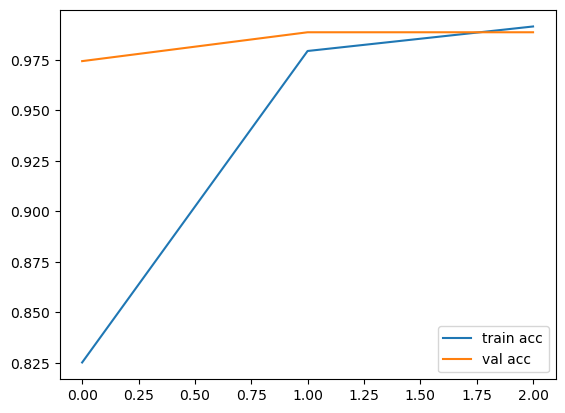

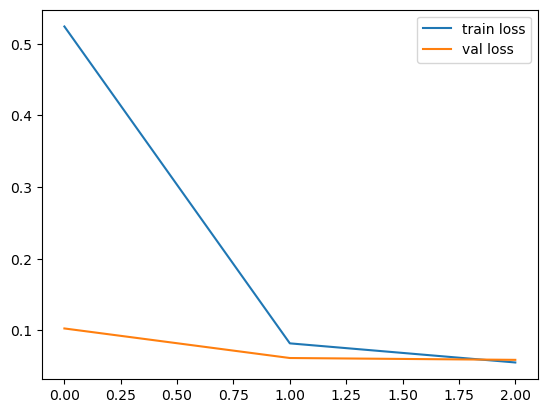

In [34]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [35]:
from keras.models import load_model
model = load_model('best_vgg_model.keras')

In [36]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)

14/14 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.9908 - loss: 0.0649


[0.04677616432309151, 0.9931350350379944]

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
print(classification_report(y_pred, test_y))

#get confusion matrix
print(confusion_matrix(y_pred,test_y))

14/14 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       140
           1       1.00      0.99      0.99       147
           2       1.00      1.00      1.00       150

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

[[140   0   0]
 [  2 145   0]
 [  0   0 150]]


In [38]:
predictions = model.predict(test_x)

14/14 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step


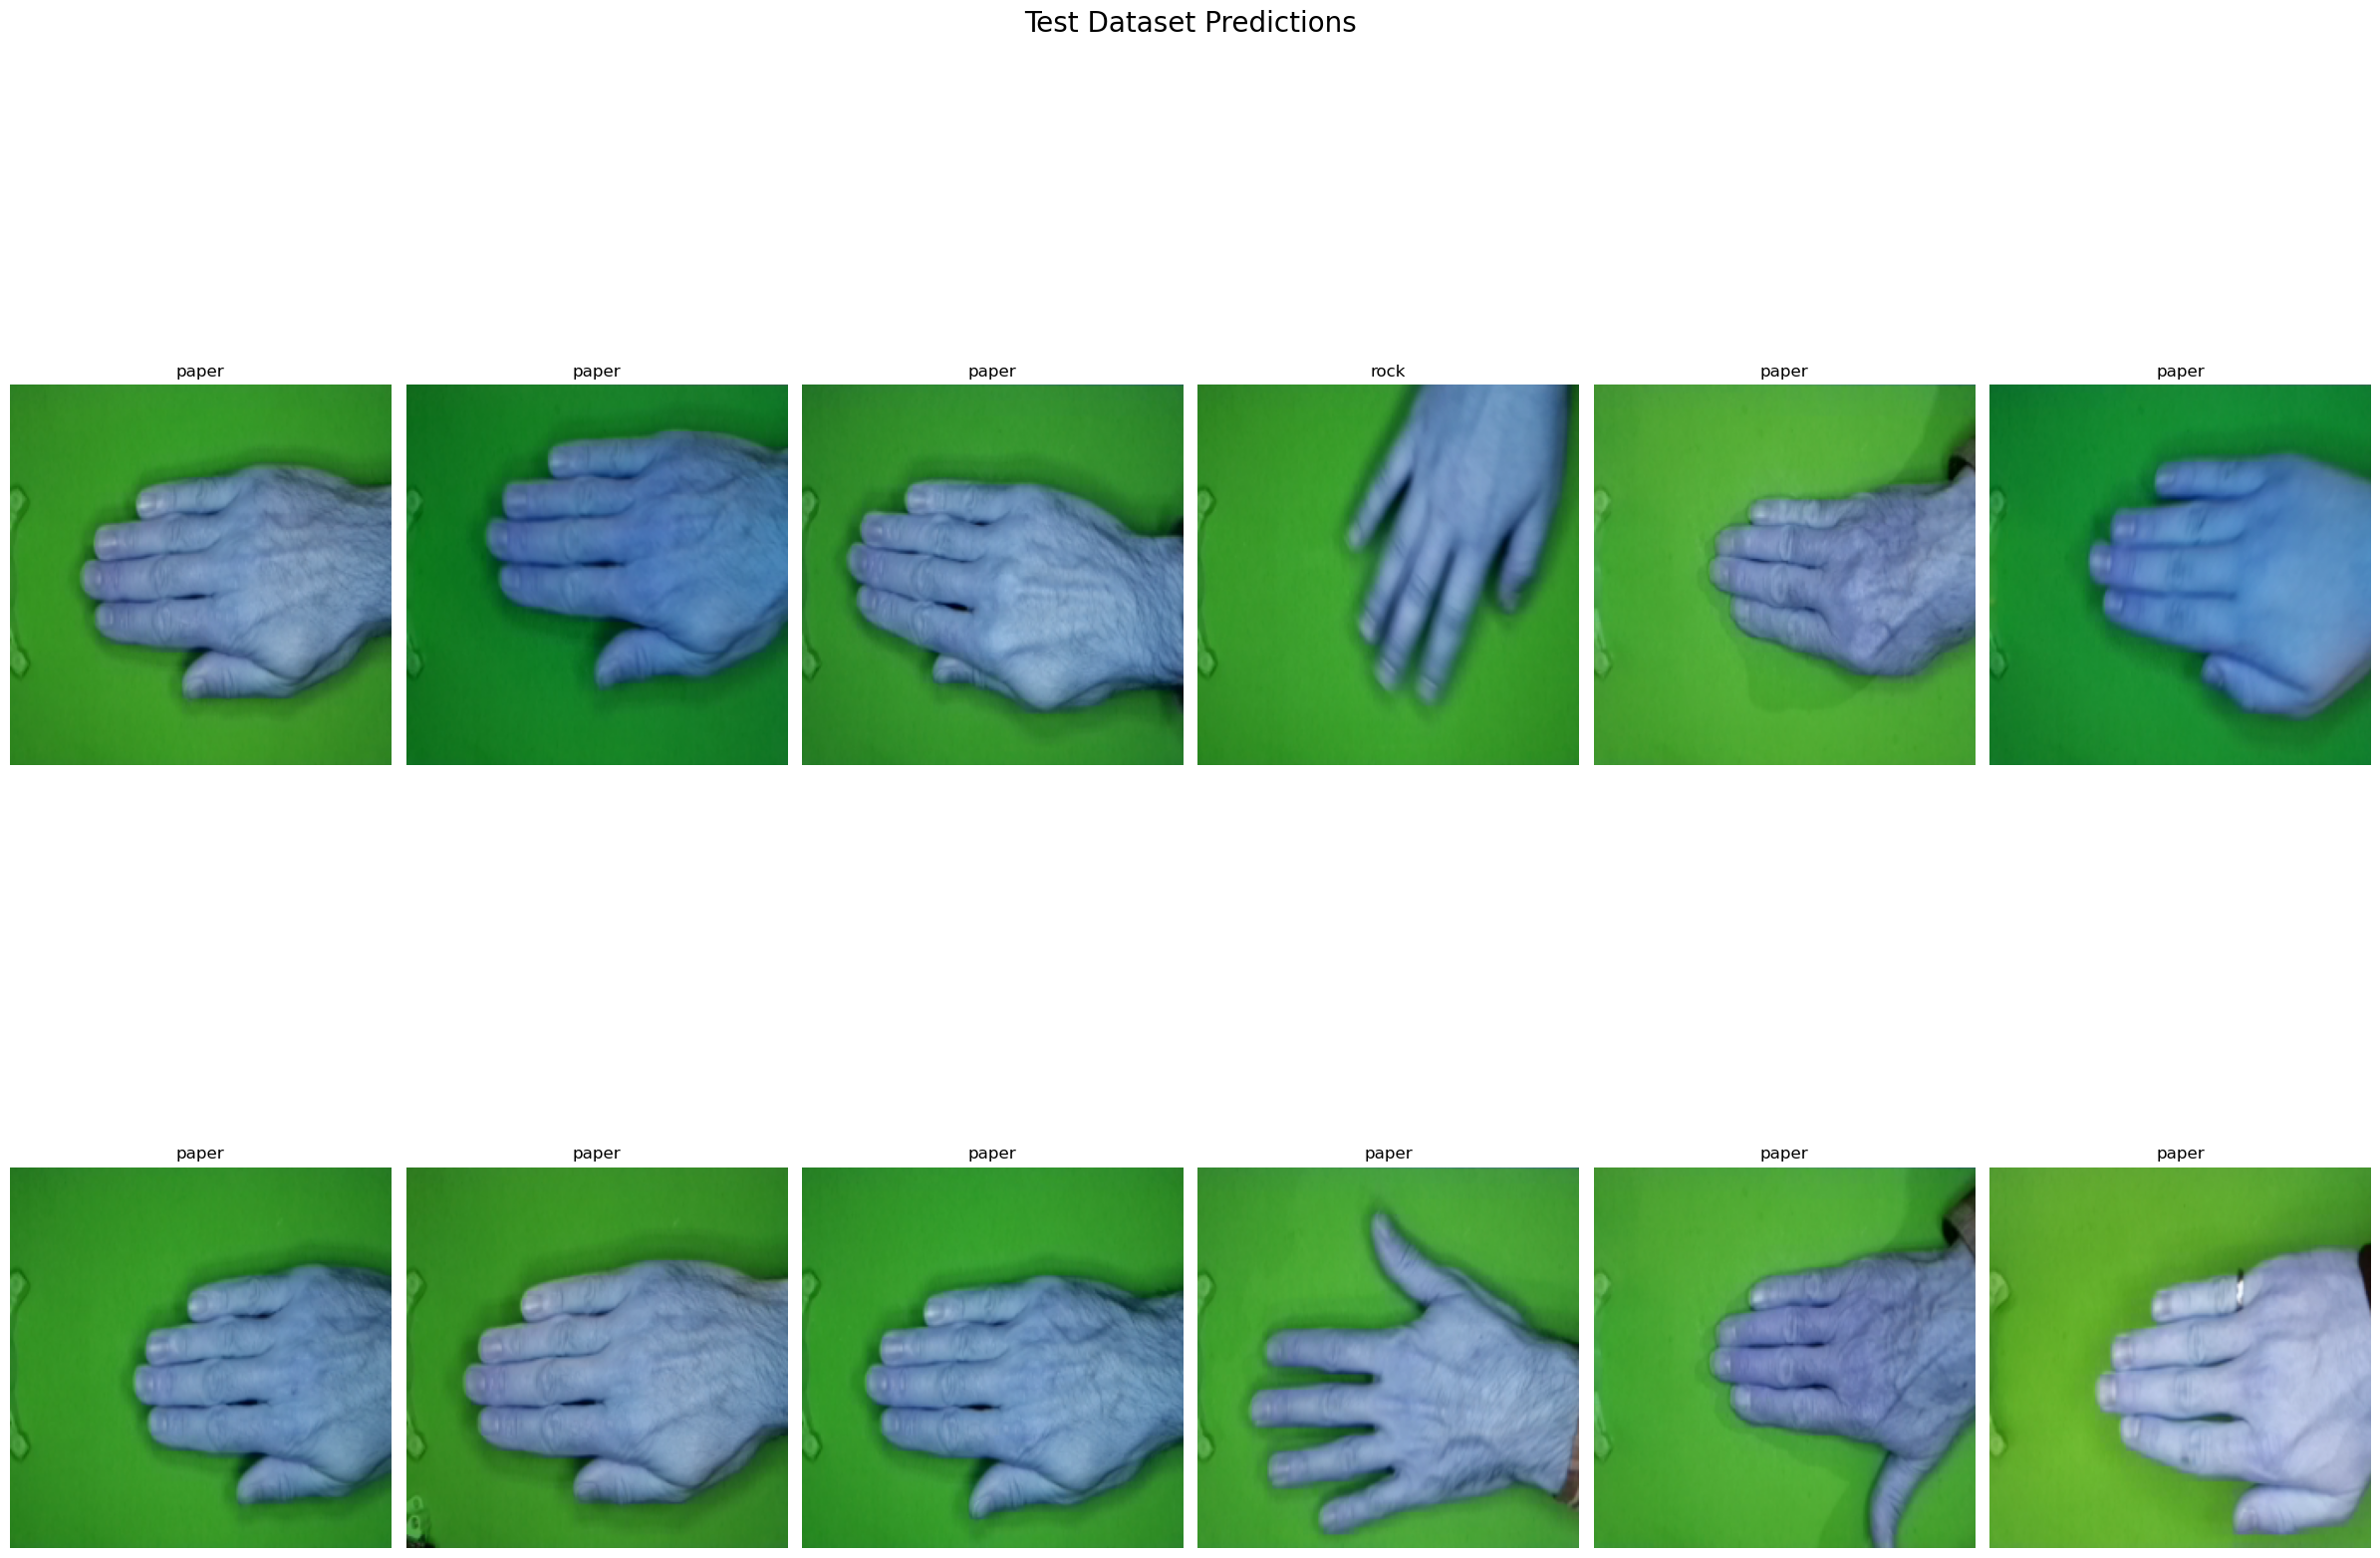

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 10

for i in range(2):
    for j in range(6):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_x[idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()